
# Retail Customer Behaviour Analysis


## Research objective

*   To better understand the types of customers who purchase chips and their purchasing behaviour in the region
*   Insights will feed into the supermarket's strategic plan for the chip category in the next half year



<!-- # Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
* [Data Cleaning](#chapter1)
* [Exploratory Analysis](#chapter2)
* [Data analysis on customer segements](#chapter3)
 
</div> -->

## Table of Contents

1. [Data cleaning](#data-cleaning)
2. [Exploratory Analysis](#exploratory-analysis)
3. [Data analysis on customer segments](#data-analysis-on-customer-segments)


In [1]:
# Loading required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime 
import xlrd
import re 


In [3]:
# Read data files into data frames 
customerdata = pd.read_csv(r'C:\Users\PC\Desktop\Jupyter files\Client assignment\QVI_purchase_behaviour (2).csv')
transactiondata = pd.read_excel(r'C:\Users\PC\Desktop\Jupyter files\Client assignment\QVI_transaction_data (1).xlsx')

## Data cleaning

Let's take a quick look at transaction data.
But, first let's create a copy of the original data just incase

In [5]:
df1 = transactiondata.copy() # Keep a copy for a quick reset 
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
# print the dimensions of the dataframe
print(df1.shape)

(264836, 8)


In [9]:
#checking data types
df1.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [11]:
#changing data types
#We only need to fix the date from xls integer dates to date format 

df1['DATE'] = pd.to_datetime(df1['DATE'], unit='D', origin='1899-12-30')
print(df1['DATE'].dtype) # check format of replacement date column 

datetime64[ns]


We want to ensure that we are only examining chip purchases. 

In [14]:
# View all unique entries in the product name column 
df1['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In order to ensure that these are all chips, lets take a step further and count the word frequencies in the product names. To make this process clearer, we can remove the digits and symbols from the names. 

In [17]:
# Remove digits from the product names
prod_name = df1['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

# Remove & characters from the product names and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

In [19]:
# Count the frequencies of words in product names and display counts in descending order
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
Smiths                28860
Salt                  27976
Cheese                27890
Pringles              25102
134g                  25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22063
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
Chilli                15390
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
300g                  12041
RRD                   11894
Sweet                 11060
Infuzions             11057
Supreme               10963
Chives                10951
Cream                 10723
WW                    10320
Popd                

In [21]:
# Remove salsas from the dataset
df1 = df1[df1['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
df1.shape # check for a reduction in no of rows 

(246742, 8)

In [23]:
#checking for missing values in each column
df1.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

## Exploratory Analysis

Now, lets take a look at descriptive stats (min, max, avg). This will help us identify any outliers/ unique values etc

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [29]:
df1.describe(include="all")

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


We can see that in the PROD_NAME column, "Kettle Mozzarella Basil & Pesto 175g", is the most frequent value indicating that perhaps customers purchase this product the most.

Now, lets take a look at the number of transaction over time to see if there are any  missing data from particular days.

In [33]:
# Aggregate the data to count the number of transactions per day
transactions_per_day = df1.groupby('DATE').size()

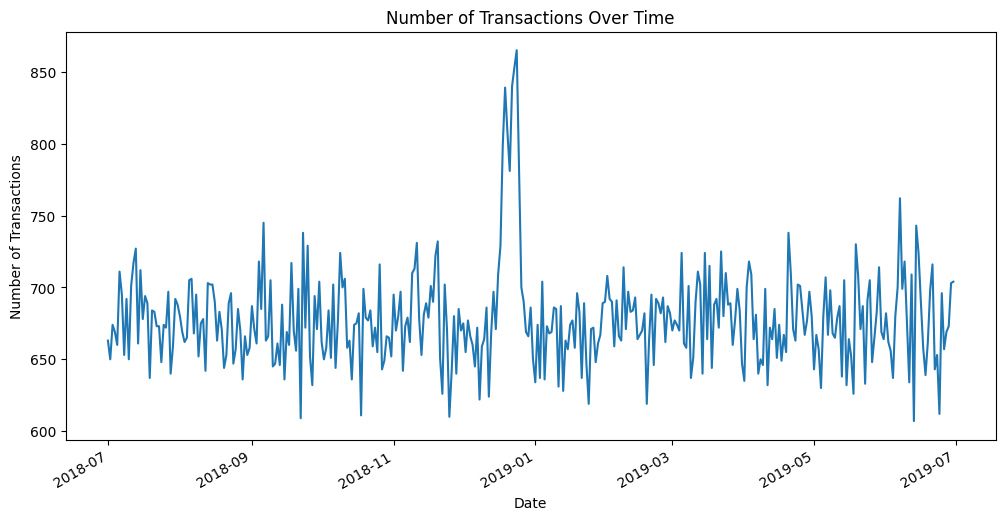

In [35]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Plot the number of transactions over time
plt.figure(figsize=(12, 6))
transactions_per_day.plot(kind='line')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


In [37]:
# Check for missing dates
all_dates = pd.date_range(start=df1['DATE'].min(), end=df1['DATE'].max())
missing_dates = all_dates.difference(transactions_per_day.index)

print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


The missing date is Christmas day, a public holiday, so it is expected that there are no sales on this day. Now, lets check for outliers in our data..

<Axes: >

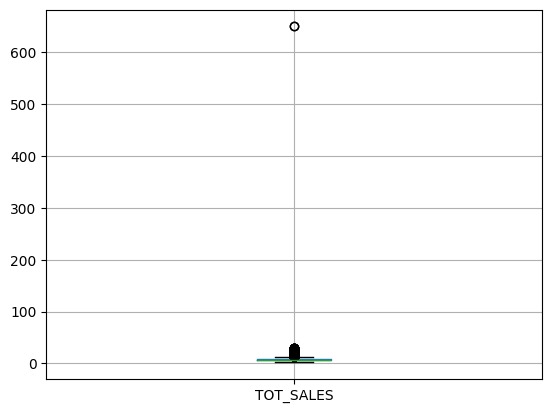

In [40]:
df1.boxplot(column=['TOT_SALES'])

By looking at outliers in total sales, we can see that there is one customer who purchases a lot more than everyone else.

Let's take a look at who they are by sorting the df.

In [44]:
#Sorting the dataframe on 'Total sales' in descending order
df2 = df1.sort_values(['TOT_SALES'], ascending=False, axis=0)

# get the top 5 entries with head function
df_top5= df2.head()


In [46]:
df_top5

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
69496,2018-08-15,49,49303,45789,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
117850,2019-05-19,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
171815,2018-08-17,24,24095,20797,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5


#### It looks like its a customer with loyalty card number 226000
 - This customer purchases from store number 226
 - This customer has a premium membership
 - It seems like this customer pucrchases once every year, possibly for commercial purposes
 - This customer purchased 200 Dorito Corn chips each time
 - We will see in subsequent exploration further down below, that this customer also belongs to the 'older family' lifestage 

Let's take a closer look

In [50]:
# Filter the entries that have 200 packets. 
df1.loc[df1['PROD_QTY'] == 200.0]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like these are the only purchase they have made so we will remove these transactions from the dataset.

In [53]:
# Remove the transactions
df1 = df1[df1['LYLTY_CARD_NBR'] != 226000]
df1.shape # check for a reduction of 2 rows (i.e. 246740 rows)

(246740, 8)

In [55]:
# Add a new column with extracted packet sizes from the product name
df1.insert(8, "PACK_SIZE", df1['PROD_NAME'].str.extract(r'(\d+)').astype(float), True)

# Sort by packet sizes to check for outliers
df1.sort_values(by='PACK_SIZE')

# Display the sorted DataFrame to examine packet sizes and potential outliers
# df1_sorted.head(20)  # Display the first 20 rows for a quick check

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
40783,2018-09-25,97,97067,96696,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42461,2019-05-05,110,110030,111890,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
176183,2018-12-30,82,82183,81660,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
227309,2018-12-03,236,236091,239098,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
42418,2018-11-05,109,109217,111470,38,Infuzions Mango Chutny Papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...
192034,2019-03-12,100,100121,99145,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
255797,2019-01-19,235,235098,238018,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0
233814,2019-01-24,151,151102,149810,4,Dorito Corn Chp Supreme 380g,1,6.5,380.0
131573,2018-07-09,213,213087,212416,4,Dorito Corn Chp Supreme 380g,2,13.0,380.0


In [56]:
df1.dropna(subset=['PACK_SIZE'])  # Drop rows where PACK_SIZE is NaN

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0


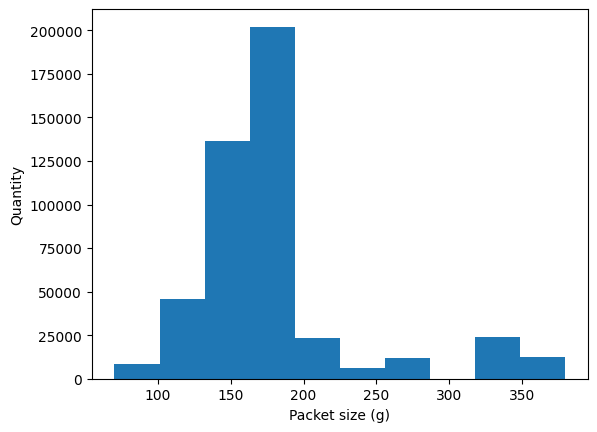

In [59]:
# Minimum packet size is 70g while max is 380g - this is reasonable. 
# Plot a histogram to visualise distribution of pack sizes.

plt.hist(df1['PACK_SIZE'], weights=df1['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity')

plt.show()

Now that the pack size looks reasonable, we can create the brand names using the first word of each product name. 

In [62]:
# Add a column to extract the first word of each product name to. 
df1.insert(9, "BRAND_NAME", df1['PROD_NAME'].str.split().str.get(0), True)
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [63]:
# Then print all unique entries to check the brand names created
df1["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some brand names have been doubled up. Replace all contractions and double ups with their full name.

In [67]:
# Create a function to identify the string replacements needed.
def replace_brandname(line):
    name = line['BRAND_NAME']
    if name == "Infzns":
        return "Infuzions"
    elif name == "Red":
        return "Red Rock Deli"
    elif name == "RRD":
        return "Red Rock Deli"
    elif name == "Grain":
        return "Grain Waves"
    elif name == "GrnWves":
        return "Grain Waves"
    elif name == "Snbts":
        return "Sunbites"
    elif name == "Natural":
        return "Natural Chip Co"
    elif name == "NCC":
        return "Natural Chip Co"
    elif name == "WW":
        return "Woolworths"
    elif name == "Smith":
        return "Smiths"
    elif name == "Dorito":
        return "Doritos"
    else:
        return name 

# Then apply the function to clean the brand names
df1["BRAND_NAME"] = df1.apply(lambda line: replace_brandname(line), axis=1)

# Check that there are no duplicate brands 
df1["BRAND_NAME"].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

The brand names seem reasonable, without duplicates. 

Now we want to examine the customer data. We can generate summaries and check the categories in this dataset.

In [69]:
# Now examine customer data
# create copy of df first
cust_df = customerdata.copy()
cust_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [72]:
# Rename "PREMIUM_CUSTOMER" to "MEMBER_TYPE" for easier identification of the column data
cust_df = cust_df.rename(columns={'PREMIUM_CUSTOMER': 'MEMBER_TYPE'})

In [74]:
# Check the summary of the customer data
cust_df.describe(include = "all")

,LYLTY_CARD_NBR,LIFESTAGE,MEMBER_TYPE
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


A few insights from descriptive stats;

- Majority of customers have a mainstream membership
- Majority of customers are Retirees

In [77]:
# Check the entries in the member type and lifestage columns
cust_df["MEMBER_TYPE"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [79]:
cust_df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

Now that the customer dataset looks fine, we want to add this information to the transactions dataset. Let's merge the two tables.

In [82]:
# Join the customer and transaction datasets, and sort transactons by date 
full_df = df1.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
full_df = full_df.reset_index()
full_df = full_df.sort_values(by='DATE').reset_index(drop=True)
full_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,LIFESTAGE,MEMBER_TYPE
0,88140,2018-07-01,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134.0,Pringles,MIDAGE SINGLES/COUPLES,Mainstream
1,60276,2018-07-01,60,57330,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150.0,Kettle,RETIREES,Mainstream
2,199014,2018-07-01,199,197623,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,RETIREES,Premium
3,35052,2018-07-01,35,31630,11,RRD Pc Sea Salt 165g,1,3.0,165.0,Red Rock Deli,YOUNG SINGLES/COUPLES,Budget
4,72104,2018-07-01,72,71038,20,Doritos Cheese Supreme 330g,2,11.4,330.0,Doritos,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,112141,2019-06-30,112,114611,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175.0,Natural Chip Co,MIDAGE SINGLES/COUPLES,Mainstream
246736,207155,2019-06-30,207,205513,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Mainstream
246737,10140,2019-06-30,10,9882,12,Natural Chip Co Tmato Hrb&Spce 175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Budget
246738,6258,2019-06-30,6,6047,29,French Fries Potato Chips 175g,1,3.0,175.0,French,YOUNG SINGLES/COUPLES,Budget


In [83]:
# Check for nulls in the full dataset
full_df.isnull().values.any()

False

In [86]:
# looks like all the data is reasonable so export to CSV
full_df.to_csv(r'C:\Users\PC\Desktop\Jupyter files\QVI_fulldata.csv')

## Data analysis on customer categories

Now that the data is cleaned, we aim to uncover key insights in the chip market to recommend a business strategy. We can look further into:

- Who spends the most on chips (total sales), describing customers by lifestage and member type/segment.
- How many customers are in each segment.
- How many chips are bought per customer by segment.
- What is the average chip price by customer segment.

In [89]:
# Group by 'LIFESTAGE' and 'MEMBER_TYPE', then sum the 'total sales'
sales_by_lifestage_and_member = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['TOT_SALES'].sum().reset_index()

# Display the result
sales_by_lifestage_and_member.sort_values(by= 'TOT_SALES', ascending=False)

,LIFESTAGE,MEMBER_TYPE,TOT_SALES
6,OLDER FAMILIES,Budget,156863.75
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20
13,RETIREES,Mainstream,145168.95
15,YOUNG FAMILIES,Budget,129717.95
9,OLDER SINGLES/COUPLES,Budget,127833.60
10,OLDER SINGLES/COUPLES,Mainstream,124648.50
11,OLDER SINGLES/COUPLES,Premium,123537.55
12,RETIREES,Budget,105916.30
7,OLDER FAMILIES,Mainstream,96413.55
14,RETIREES,Premium,91296.65


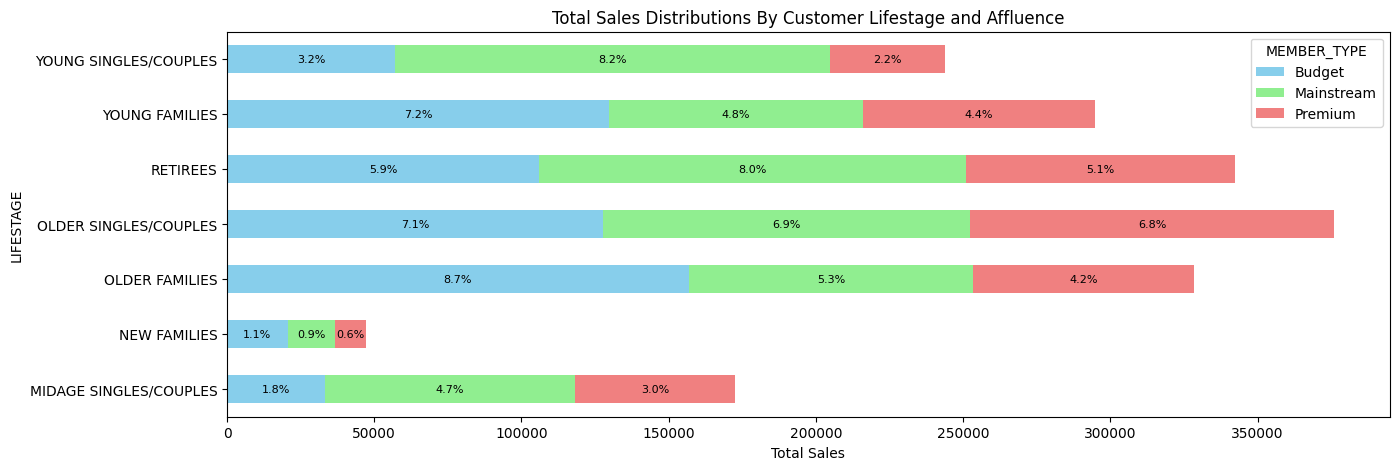

In [91]:
# Get the total sales 
total_sales = full_df['TOT_SALES'].agg(['sum'])['sum']

# Plot a breakdown of the total sales by lifestage and member type
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']
total_sales_breakdown = full_df.groupby(['LIFESTAGE','MEMBER_TYPE'])['TOT_SALES'].agg(['sum', 'mean']).unstack('MEMBER_TYPE').fillna(0)
ax = total_sales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5), color=colors)

# Add percentages of the summed total sales as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Affluence')
plt.show()
    

We can see more clearly, which lifestage is dominating sales in each member type.

- budget - Older families
- Mainstream - Young singles/couples
- Premium - Retirees

But, lets check whether these percentages are simply just reflecting the frequency of customers in each segment

In [95]:
# Check all rows are unique in customer information
len(cust_df['LYLTY_CARD_NBR'].unique()) == cust_df.shape[0]

True

In [97]:
# Check if all customers made chip purchases. 
len(cust_df['LYLTY_CARD_NBR'].unique()) == len(full_df['LYLTY_CARD_NBR'].unique())

False

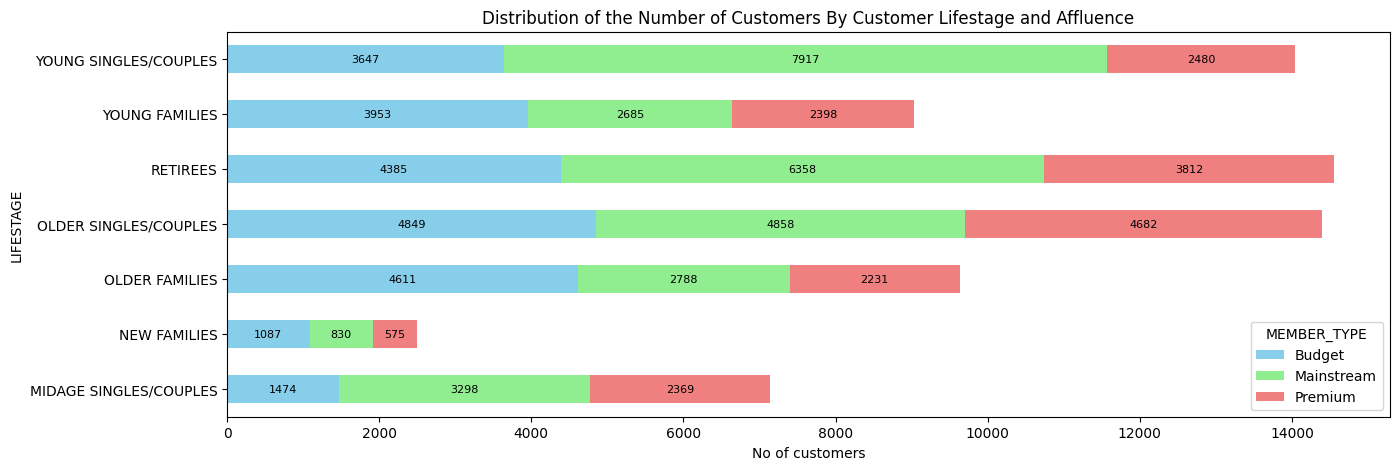

In [99]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
colours = ['skyblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']
sum_customers= full_df.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].agg('nunique').unstack('MEMBER_TYPE').fillna(0)
ax = sum_customers.plot(kind='barh', stacked=True, figsize=(15, 5), color=colours)

# Add customer numbers as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.0f}'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("No of customers")
ax.set_title('Distribution of the Number of Customers By Customer Lifestage and Affluence')
plt.show()
    

Another way of counting values in each member type

In [102]:
count_of_customer_type = full_df["MEMBER_TYPE"].value_counts()
count_of_customer_type

MEMBER_TYPE
Mainstream    95043
Budget        86762
Premium       64935
Name: count, dtype: int64

In [104]:
count_of_lifestage = full_df["LIFESTAGE"].value_counts()
count_of_lifestage

LIFESTAGE
OLDER SINGLES/COUPLES     50793
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: count, dtype: int64

We can then take a look at the total and average units of chips bought per customer by LIFESTAGE and MEMBER_TYPE.

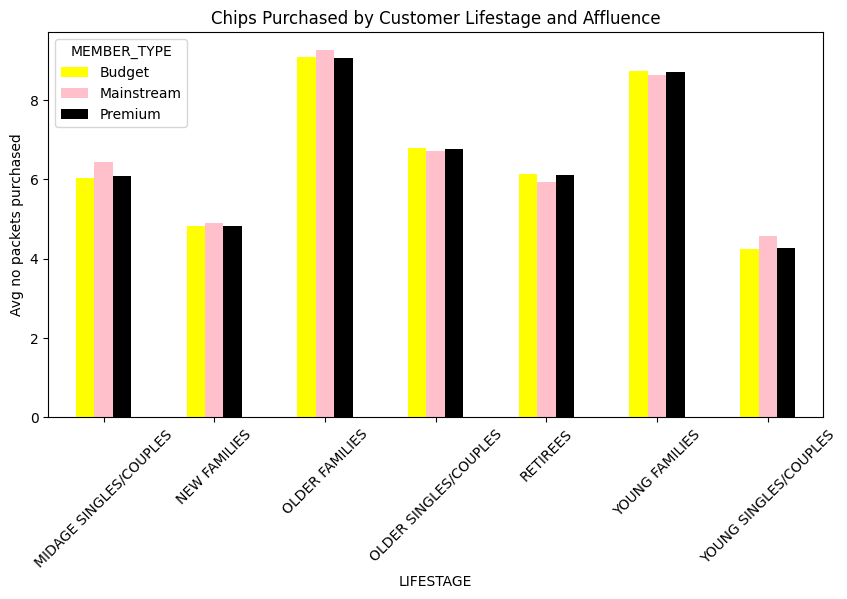

In [107]:
# Plot the average no of chip packets bought per customer by LIFESTAGE and MEMBER_TYPE.
colours = ['yellow', 'pink', 'black']
no_packets_data = full_df.groupby(['LIFESTAGE','MEMBER_TYPE'])['PROD_QTY'].sum()/full_df.groupby(['LIFESTAGE','MEMBER_TYPE'])['LYLTY_CARD_NBR'].nunique(0)
ax = no_packets_data.unstack('MEMBER_TYPE').fillna(0).plot.bar(stacked = False,figsize=(10, 5), color=colours)
ax.set_ylabel("Avg no packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Affluence')
plt.xticks(rotation=45)
plt.show()

Older families and young families in general buy more chips per customer. We can also investigate the average price per unit sold by LIFESTAGE and MEMBER_TYPE.

In [110]:
# Create a column for the unit price of chips purchased per transaction 
full_df['UNIT_PRICE'] = full_df['TOT_SALES']/full_df['PROD_QTY']

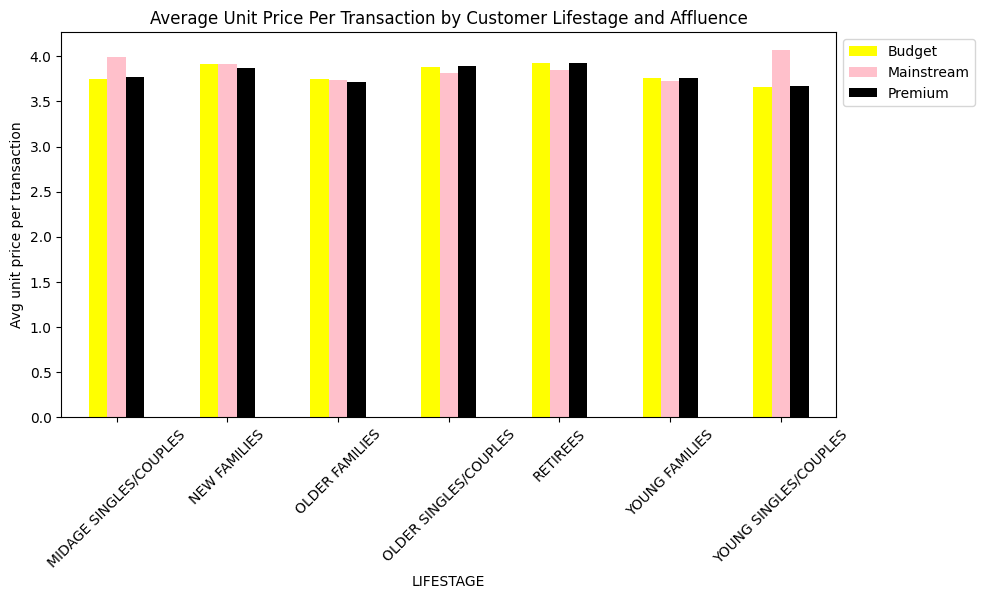

In [112]:
#as_index=False was removed
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
colours = ['yellow', 'pink', 'black']
avg_priceperunit = full_df.groupby(['LIFESTAGE', 'MEMBER_TYPE'])['UNIT_PRICE'].agg(['mean']).unstack('MEMBER_TYPE').fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5), color=colours)
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Affluence')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.show()

For young and midage singles/couples, the mainstream group are more willing to pay more for a packet of chips than their budget and premium counterpart. Given the total sales, as well as the number of customers buying chips, is higher in these groups compared to the non-mainstream groups, this suggests that chips may not be the choice of snack for these groups. Further information on shopping habits would be useful in this case. 


## Key takeaways

The three highest contributing segments to the total sales are:
 1. budget - Older families
 2. Mainstream - Young singles/couples
 3. Premium - Retirees


The largest population group is Older singles/couples followed by retirees which explains their large total sales. 

The most common membership type across all lifestages is mainstream.

Older families and young families in general buy more chips per customer. Furthermore, mainstream young singles/couples have the highest spend per purchase.

"Kettle" is the most frequent chip brand.

Conclusively, business strategy should be geared towards increasing Kettle chips and targetting mainstream older families, young families and retirees.